[[0.63792447 0.23604352 0.12603201]
 [0.56932383 0.41209063 0.01858554]
 [0.15856585 0.35778372 0.48365043]
 [0.35650691 0.61861339 0.0248797 ]
 [0.61918177 0.04815405 0.33266417]
 [0.68602917 0.15808548 0.15588535]
 [0.44807502 0.45341063 0.09851436]
 [0.49235737 0.34183918 0.16580345]
 [0.40756396 0.51495861 0.07747743]
 [0.47591756 0.43862676 0.08545568]
 [0.41482836 0.16685776 0.41831388]
 [0.30470909 0.08853898 0.60675193]
 [0.57031855 0.36713674 0.06254471]
 [0.1277725  0.70848696 0.16374053]
 [0.08558133 0.67543211 0.23898656]
 [0.27648443 0.38924148 0.33427408]
 [0.45439585 0.52338212 0.02222203]
 [0.84447318 0.08747348 0.06805334]
 [0.42164758 0.52938864 0.04896378]
 [0.79464081 0.09874462 0.10661457]
 [0.71050489 0.2711425  0.01835261]
 [0.53213744 0.09456064 0.37330192]
 [0.68988767 0.16434394 0.14576838]
 [0.2832107  0.14803546 0.56875384]
 [0.34775568 0.28386283 0.36838149]
 [0.43918657 0.27086534 0.28994809]
 [0.55872234 0.31292532 0.12835234]
 [0.13901858 0.74416852 0.11

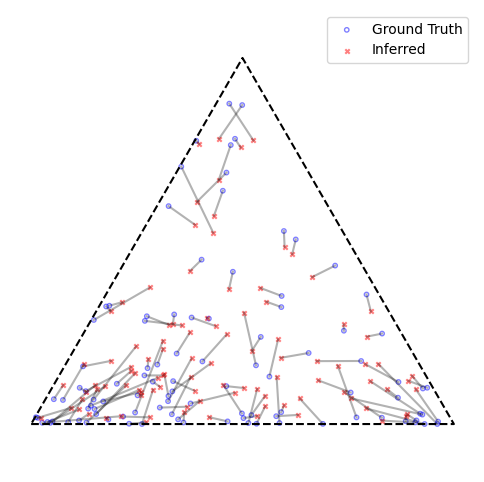

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
n = 100
alpha = [1.1, .6, .5]
samples = np.random.dirichlet(alpha, size=n)
noise = np.random.normal(0, 0.1, samples.shape)
inferred = samples + np.abs(noise)
inferred = inferred/np.sum(inferred, axis=1, keepdims=True)  # Normalize to stay in simplex
print(inferred)

# Triangle vertices (equilateral triangle)
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, np.sqrt(3)/2])

# Barycentric -> Cartesian
def barycentric_to_cartesian(p):
    return p[0]*v1 + p[1]*v2 + p[2]*v3

true_points = np.array([barycentric_to_cartesian(p) for p in samples])

inferred_points = np.array([barycentric_to_cartesian(p) for p in inferred])



# Plot
plt.figure(figsize=(6,6))
plt.scatter(true_points[:,0], true_points[:,1], s=10, marker='o', alpha=0.5, facecolors='none', edgecolors='b', label='Ground Truth')
plt.scatter(inferred_points[:,0], inferred_points[:,1], s=10, marker='x', alpha=0.5, color='r', label='Inferred')
plt.legend()
for i in range(n):
    plt.plot([true_points[i,0], inferred_points[i,0]], [true_points[i,1], inferred_points[i,1]], '-', c='k', alpha=0.3)
plt.plot([v1[0], v2[0], v3[0], v1[0]],
         [v1[1], v2[1], v3[1], v1[1]], 'k--')  # Triangle outline
plt.axis('off')
plt.axis('equal')

plt.show()